In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fourier_transform_frequencies(size_of_function, sample_rate):
    
    N = size_of_function
    kvalues = np.empty(N)
    
    if N % 2 == 0:
        kvaluesoriginal = np.linspace(-N/2,(N/2)-1,N)/(sample_rate*N)
    else:
        kvaluesoriginal = np.linspace(-(N-1)/2,(N-1)/2,N)/(sample_rate*N)
    newN = int(N/2)
    if N % 2 == 0:
        kvalues[0:newN] = kvaluesoriginal[newN:N]
        kvalues[newN:N] = kvaluesoriginal[0:newN]
    if N % 2 != 0:
        kvalues[0:newN+1] = kvaluesoriginal[newN:N]
        kvalues[newN+1:N] = kvaluesoriginal[0:newN]
        
    return kvalues

In [3]:
def fourier_transform_complex(function):
    
    N = np.size(function)
    x = np.arange(0,N,1)
    complex_coefficients = np.empty(N,dtype=np.complex)
    integrand = np.empty(N,dtype=np.complex)
    
    for n in range(0,N):
        integrand = function*np.exp(n*(-1j)*x*2*np.pi/N)
        complex_coefficients[n] = sum(integrand)
    
    return complex_coefficients

In [4]:
def fourier_transform_trig(function):
    
    N = np.size(function)
    x = np.arange(0,N,1)
    avalues = np.empty(N)
    bvalues = np.empty(N)

    for n in range(0,N):
        integranda = np.empty(N)
        integrandb = np.empty(N)
        for i in range(0,N):
            integranda = -function*np.sin(n*x*2*np.pi/N)
            integrandb =  function*np.cos(n*x*2*np.pi/N)
        avalues[n] = sum(integranda)
        bvalues[n] = sum(integrandb)
    
    return avalues, bvalues

In [5]:
def inverse_fourier_transform(complex_coefficients):

    N = np.size(complex_coefficients)
    x = np.arange(0,N,1)
    ifft_piece = 0
    ifft_of_f = 0 + 0*1j
        
    for n in range(0,N):
        ifft_piece = complex_coefficients[n]*np.exp(n*1j*x*2*np.pi/N)
        ifft_of_f += ifft_piece/N
    
    return ifft_of_f.real

In [6]:
def inverse_fourier_transform_weird(complex_coefficients):

    N = np.size(complex_coefficients)
    x = np.arange(0,N,1)
    ifft_piece = 0
    ifft_of_f = np.empty(N, dtype=np.complex)
        
    for n in range(0,N):
        ifft_piece = (1/N)*complex_coefficients[n]*np.exp(n*1j*x*2*np.pi/N)
        ifft_of_f[n] = sum(ifft_piece)
    
    
    k0 = (2*np.pi)/N
    x = np.arange(0,N,1)
    ifft_piece = 0
    ifft_of_f = 0 + 0*1j

    
    for n in range(0,N):
        ifft_piece = -avalues[n]*np.sin((n)*k0*x) + bvalues[n]*np.cos((n)*k0*x)
        ifft_of_f += ifft_piece/N
    
    
    return ifft_of_f.real

In [10]:
#just messing around
print(y2_inverse, '\n\n\n', inverse_fourier_transform_weird(y2_coefficients))

NameError: name 'y2_inverse' is not defined

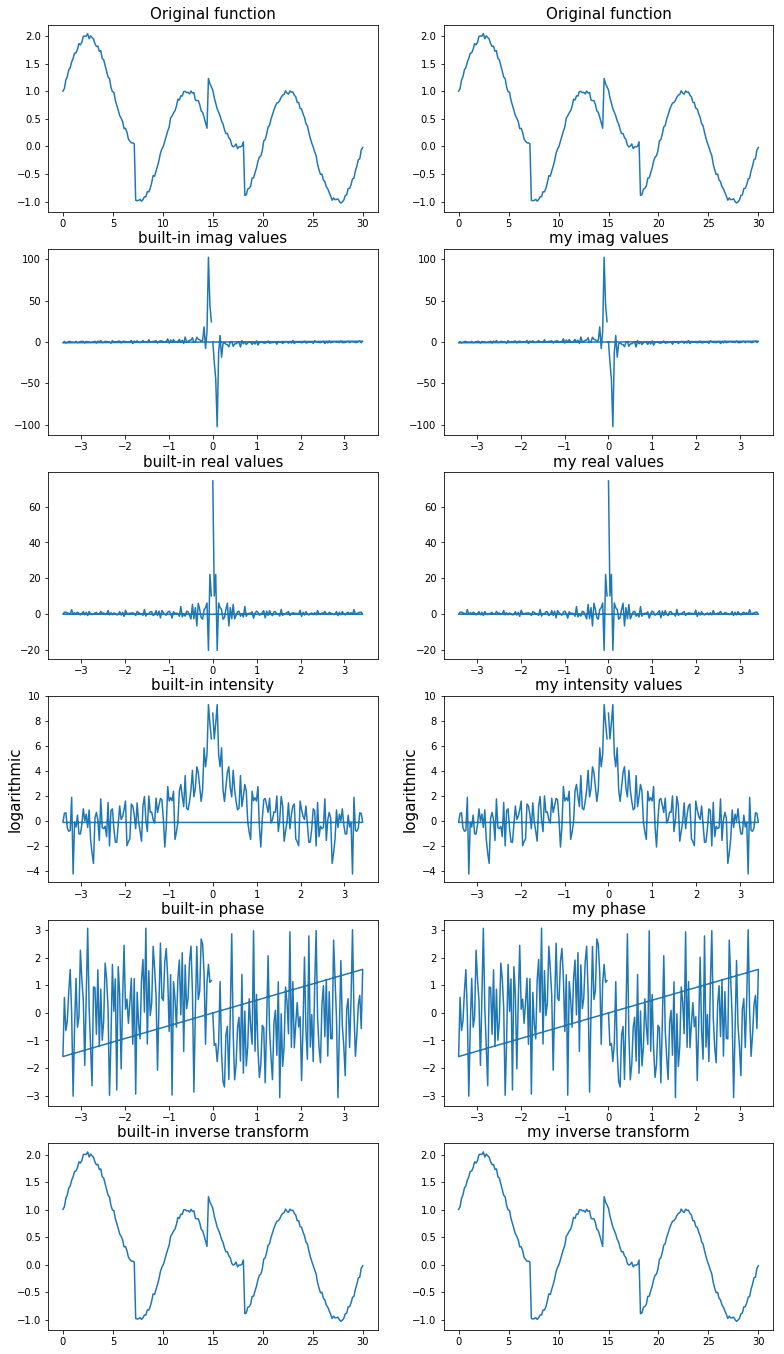

In [11]:
#The next 12 lines or so are setting up the main function and calling/defining 
#the rest of the things to be plotted.
r = np.zeros(207)
r[0:50] = 1
r[100:125] = 1

sample_rate = .1456
x = np.arange(0,30,sample_rate)
y = r + np.sin(2*np.pi* .1 * x) + (1/10.0)*(np.random.rand(np.size(x)) - .5)
k = np.fft.fftfreq(np.size(y),sample_rate)
y_fft = np.fft.fft(y)
y2_coefficients = fourier_transform_complex(y)
ky = fourier_transform_frequencies(np.size(y), sample_rate)
y2_inverse = inverse_fourier_transform(y2_coefficients)


#Below to end of cell is just plotting the functions defined above.
plt.subplots(figsize=(13,24))
plt.subplot(6,2,1)
plt.title('Original function', fontsize=15)
plt.plot(x,y)

plt.subplot(6,2,3)
plt.title('built-in imag values', fontsize=15)
plt.plot(k,y_fft.imag)

plt.subplot(6,2,5)
plt.title('built-in real values', fontsize=15)
plt.plot(k,y_fft.real)

plt.subplot(6,2,7)
plt.title('built-in intensity', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.plot(k,np.log((np.absolute(y_fft))**2))

plt.subplot(6,2,9)
plt.title('built-in phase', fontsize=15)
plt.plot(k,np.angle(y_fft))

plt.subplot(6,2,11)
plt.title('built-in inverse transform', fontsize=15)
plt.plot(x,np.fft.ifft(y_fft).real)



plt.subplot(6,2,2)
plt.title('Original function', fontsize=15)
plt.plot(x,y)

plt.subplot(6,2,4)
plt.title('my imag values', fontsize=15)
plt.plot(ky,y2_coefficients.imag)

plt.subplot(6,2,6)
plt.title('my real values', fontsize=15)
plt.plot(ky,y2_coefficients.real)

plt.subplot(6,2,8)
plt.title('my intensity values', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.plot(ky,np.log((np.absolute(y2_coefficients))**2))

plt.subplot(6,2,10)
plt.title('my phase', fontsize=15)
plt.plot(ky,np.angle(y2_coefficients))

plt.subplot(6,2,12)
plt.title('my inverse transform', fontsize=15)
plt.plot(x,y2_inverse)
plt.show()

/home/carter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/home/carter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log


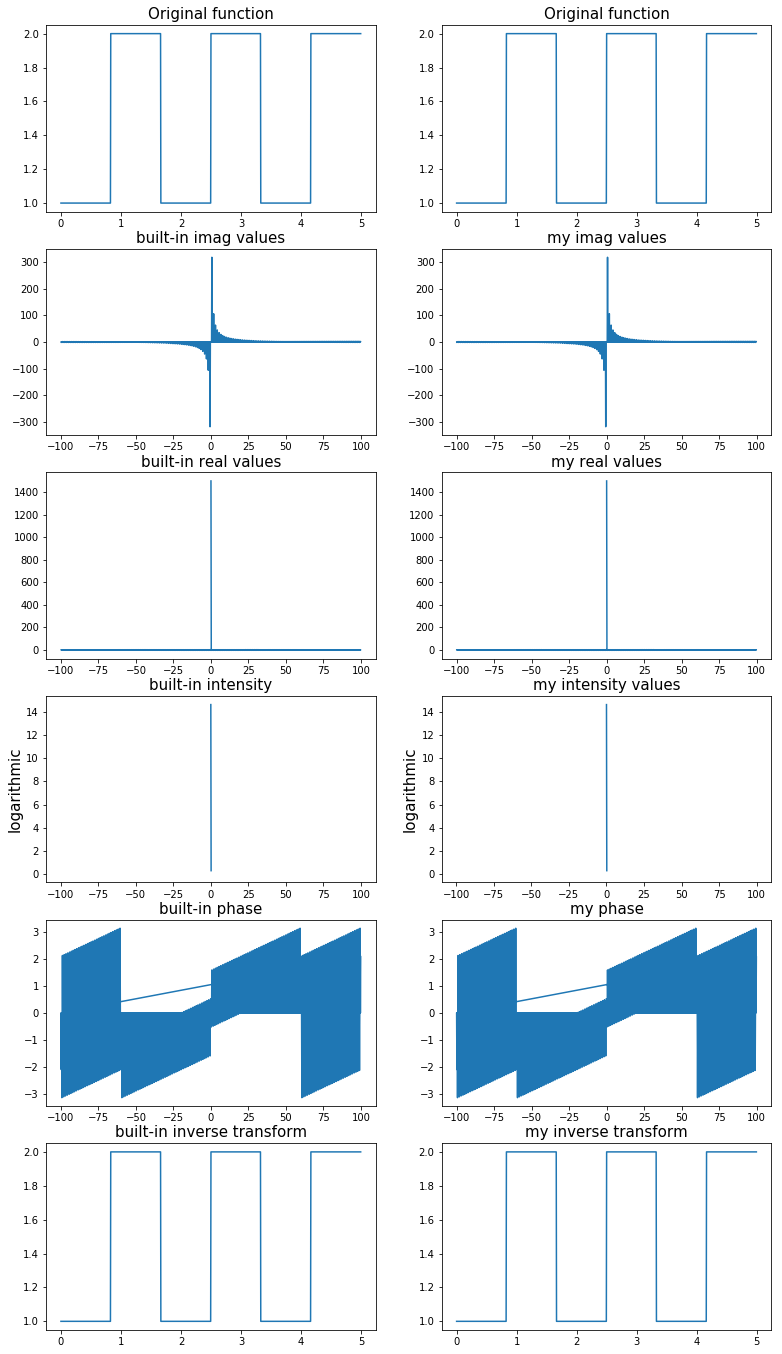

In [11]:
#The next 15 lines or so are setting up the main function and calling/defining 
#the rest of the things to be plotted.
sample_rate = .005
x = np.arange(0,5,sample_rate)
N = np.size(x)
function = np.ones(N)
function[int(np.floor(1*N/6)):int(np.floor(2*N/6))] = 2
function[int(np.floor(3*N/6)):int(np.floor(4*N/6))] = 2
function[int(np.floor(5*N/6)):int(np.floor(6*N/6))] = 2

y = function

k = np.fft.fftfreq(np.size(y),sample_rate)
y_fft = np.fft.fft(y)
y2_coefficients = fourier_transform_complex(y)
ky = fourier_transform_frequencies(np.size(y), sample_rate)
y2_inverse = inverse_fourier_transform(y2_coefficients)


#Below to end of cell is just plotting the functions defined above.
plt.subplots(figsize=(13,24))
plt.subplot(6,2,1)
plt.title('Original function', fontsize=15)
plt.plot(x,y)

plt.subplot(6,2,3)
plt.title('built-in imag values', fontsize=15)
plt.plot(k,y_fft.imag)

plt.subplot(6,2,5)
plt.title('built-in real values', fontsize=15)
plt.plot(k,y_fft.real)

plt.subplot(6,2,7)
plt.title('built-in intensity', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.plot(k,np.log((np.absolute(y_fft))**2))

plt.subplot(6,2,9)
plt.title('built-in phase', fontsize=15)
plt.plot(k,np.angle(y_fft))

plt.subplot(6,2,11)
plt.title('built-in inverse transform', fontsize=15)
plt.plot(x,np.fft.ifft(y_fft).real)



plt.subplot(6,2,2)
plt.title('Original function', fontsize=15)
plt.plot(x,y)

tolerance = 1e-10
y2_coefficients.real[abs(y2_coefficients.real) < tolerance] = 0.0
y2_coefficients.imag[abs(y2_coefficients.imag) < tolerance] = 0.0

plt.subplot(6,2,4)
plt.title('my imag values', fontsize=15)
plt.plot(ky,y2_coefficients.imag)

plt.subplot(6,2,6)
plt.title('my real values', fontsize=15)
plt.plot(ky,y2_coefficients.real)

plt.subplot(6,2,8)
plt.title('my intensity values', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.plot(ky,np.log((np.absolute(y2_coefficients))**2))

plt.subplot(6,2,10)
plt.title('my phase', fontsize=15)
plt.plot(ky,np.angle(y2_coefficients))

plt.subplot(6,2,12)
plt.title('my inverse transform', fontsize=15)
plt.plot(x,y2_inverse)
plt.show()